# Partie A : Exploration des données 

In [18]:
# Importation des bibliothèques nécessaires
import pandas as pd


# 1.  Charger le fichier CSV ou Excel avec pandas. 
df = pd.read_csv("../data/ventes.csv")


# 2.  Afficher les 5 premières lignes du dataset. 
print(df.head())

# 3.  Afficher les informations générales du dataset 
print("\n------------------------------------------")
print("\nLes informations générales du dataset :"
      , df.info()
      )

print("\n------------------------------------------")
print("\nLes statistiques descriptives du dataset :"
      ,df.describe()
      )

# 4.  Identifier s’il existe des valeurs manquantes. 
print("\n------------------------------------------")
print("\nLa liste des produits qui ont des valeurs manquantes : \n"
      ,df.isnull().sum()
      )


         Date     Produit     Catégorie  Quantité  PrixUnitaire    Magasin
0  2022-04-13  Smartphone          Mode        10       1009.00       Lyon
1  2023-03-12    Pantalon  Électronique         2        782.86      Paris
2  2022-09-28    Pantalon          Mode        19       1159.62   Bordeaux
3  2022-04-17     Fromage  Électronique         9        782.64   Bordeaux
4  2022-03-13          TV          Mode         7       1279.01  Marseille

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          200 non-null    object 
 1   Produit       200 non-null    object 
 2   Catégorie     200 non-null    object 
 3   Quantité      200 non-null    int64  
 4   PrixUnitaire  200 non-null    float64
 5   Magasin       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+

# Partie B : Nettoyage et préparation 

In [ ]:
# 5.  Convertir la colonne Date en type datetime.

print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
print("--------------------------------------------------------------------------")
print(df['Date'].dtypes)
df.to_csv("../data/ventes.csv")
print("\n--------------------------------------------------------------------------")
print(df.head())


# 6.  Créer une nouvelle colonne ChiffreAffaires = Quantité * PrixUnitaire.

print("\n--------------------------------------------------------------------------")
df['ChiffreAffaires'] = df['Quantité'] * df['PrixUnitaire']

# 7.  Vérifier s’il existe des doublons et les supprimer.

print("\n--------------------------------------------------------------------------")

df.loc[len(df)] = [pd.to_datetime('2022-04-13'), 'Smartphone', 'Mode', 10, 1009.00, 'Lyon', 10090.00]
print("\nListe des produits doublons : \n",df.duplicated())
print("\nNombre de doublons sur 'Produit' : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nNombre de doublons sur 'Produit' : ", df.duplicated().sum())



--------------------------------------------------------------------------

Liste des produits doublons : 
 0     False
1     False
3     False
4     False
6     False
10    False
dtype: bool

Nombre de doublons sur 'Produit' :  0

Nombre de doublons sur 'Produit' :  0


# Partie C : Analyses simples 

In [99]:
# 8.  Trouver le produit le plus vendu en termes de quantité. 

print("\nProduit le plus vendu : \n",df.loc[df['Quantité'].idxmax()])
print("****************************************")
print("\nLe produit le plus cher : \n",df.loc[df['PrixUnitaire'].idxmax()])

print("\n-----------------------------------------------")

print("\nProduit le moins vendu : \n",df.loc[df['Quantité'].idxmin()])
print("*****************************************")
print("\nProduit le moins cher : \n",df.loc[df['PrixUnitaire'].idxmin()])


# 9.  Calculer le chiffre d’affaires total par catégorie. 
print("\n-----------------------------------------------")

chiff_par_categorie = df.groupby('Catégorie', as_index=False)['ChiffreAffaires'].sum()

print("\n",chiff_par_categorie)


Produit le plus vendu : 
 Date               2022-01-21 00:00:00
Produit                        T-shirt
Catégorie                 Électronique
Quantité                            18
PrixUnitaire                     843.6
Magasin                      Marseille
ChiffreAffaires                15184.8
Name: 6, dtype: object
****************************************

Le produit le plus cher : 
 Date               2022-03-13 00:00:00
Produit                             TV
Catégorie                         Mode
Quantité                             7
PrixUnitaire                   1279.01
Magasin                      Marseille
ChiffreAffaires                8953.07
Name: 4, dtype: object

-----------------------------------------------

Produit le moins vendu : 
 Date               2023-03-12 00:00:00
Produit                       Pantalon
Catégorie                 Électronique
Quantité                             2
PrixUnitaire                    782.86
Magasin                          Paris


In [ ]:
pivot = df.pivot_table(
    values= 'ChiffreAffaires',
    index= ['Catégorie','Magasin'],
    aggfunc= 'sum'
)

pivot

ChiffreAffaires
Catégorie    Magasin                   
Mode         Lyon              10090.00
             Marseille          9145.19
Électronique Bordeaux           7043.76
             Marseille         15184.80
             Paris              1565.72

In [122]:
# 10. Calculer le chiffre d’affaires moyen par magasin

chiff_moyenne_par_magasin = df.groupby('Magasin', as_index=False)['ChiffreAffaires'].mean()
print(chiff_moyenne_par_magasin)

# 11. Compter le nombre de ventes par mois
df['mois'] = df['Date'].dt.to_period('M')
print("\n---------------------------------------------------")
compter_ventes_par_mois = df.groupby('mois', as_index=False)['Quantité'].count()
print(compter_ventes_par_mois)

     Magasin  ChiffreAffaires
0   Bordeaux      7043.760000
1       Lyon     10090.000000
2  Marseille      8109.996667
3      Paris      1565.720000

---------------------------------------------------
      mois  Quantité
0  2022-01         1
1  2022-03         1
2  2022-04         2
3  2022-08         1
4  2023-03         1


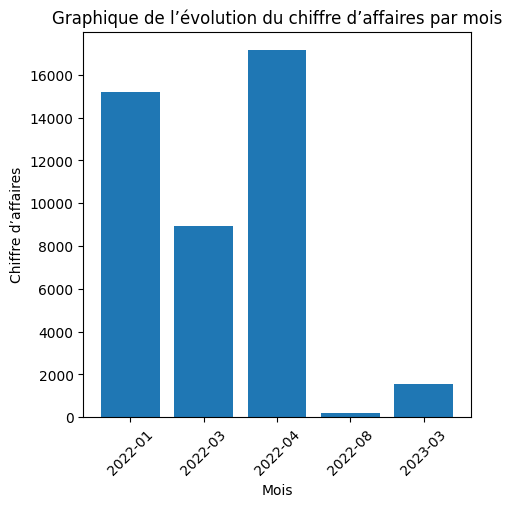

In [117]:
import matplotlib.pyplot as plt

df['mois'] = df['Date'].dt.to_period('M')
chiff_par_mois = df.groupby('mois', as_index=False)['ChiffreAffaires'].sum()

plt.figure(figsize=(5,5))
plt.bar(chiff_par_mois['mois'].astype(str), chiff_par_mois['ChiffreAffaires']) 
plt.title("Graphique de l’évolution du chiffre d’affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.xticks(rotation=45)  
plt.show()


# Partie E : Analyses supplémentaires 

In [151]:
# 15. Identifier le magasin avec le plus grand chiffre d’affaires cumulé

magasin_plus_grand_chiff = df.groupby('Magasin')['ChiffreAffaires'].sum()
print("\nLe magasin avec le plus grand chiffre d’affaires cumulé est : ", magasin_plus_grand_chiff.idxmax())


# 16. Trouver le mois où les ventes (quantité) ont été les plus fortes

print("\n---------------------------------------------------")
mois_ventes_plus_fortes = df.groupby('mois', as_index=False)['Quantité'].sum()
print("\nle mois où les ventes (quantité) ont été les plus fortes : \n", mois_ventes_plus_fortes.idxmax())

# 17. Calculer le prix unitaire moyen par produit

print("\n---------------------------------------------------")
prix_unitaire_par_produit = df.groupby('Produit')['PrixUnitaire'].mean()
print("\nle prix unitaire moyen par produit (dh): \n",prix_unitaire_par_produit)

# 18. Afficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité)

print("\n---------------------------------------------------")
categ_plus_ventes = df.groupby('Catégorie')['Quantité'].sum()
print("\nAfficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité) : \n",categ_plus_ventes.head(3))

# 19. Analyser la répartition des ventes par jour de la semaine (CA total)

print("\n---------------------------------------------------")
df['jour'] = df['Date'].dt.day_name()
ventes_par_jour = df.groupby('jour')['Quantité'].sum()
print("\nla répartition des ventes par jour de la semaine : \n",ventes_par_jour)
print("\n*****En se basant sur les resultats le jour a le plus frequant ventes est : ",ventes_par_jour.idxmax())



Le magasin avec le plus grand chiffre d’affaires cumulé est :  Marseille

---------------------------------------------------

le mois où les ventes (quantité) ont été les plus fortes : 
 mois        4
Quantité    2
dtype: int64

---------------------------------------------------

le prix unitaire moyen par produit (dh): 
 Produit
Chaussures      48.03
Fromage        782.64
Pantalon       782.86
Smartphone    1009.00
T-shirt        843.60
TV            1279.01
Name: PrixUnitaire, dtype: float64

---------------------------------------------------

Afficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité) : 
 Catégorie
Mode            21
Électronique    29
Name: Quantité, dtype: int64

---------------------------------------------------

la répartition des ventes par jour de la semaine : 
 jour
Friday       18
Sunday       18
Wednesday    14
Name: Quantité, dtype: int64

*****En se basant sur les resultats le jour a le plus frequant ventes est :  Friday


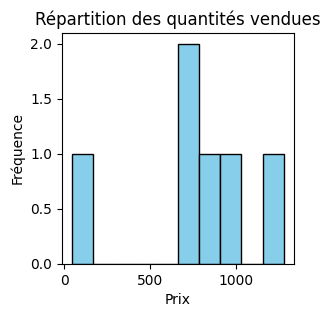

In [ ]:
# 20. Créer un histogramme représentant la répartition des quantités vendues. 

plt.figure(figsize=(3,3))
plt.hist(df['Quantité'], bins=10, color='skyblue', edgecolor='black')
plt.title("Répartition des quantités vendues")
plt.xlabel("Quantité")
plt.ylabel("Fréquence")
plt.show()